In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [52]:
df = pd.read_csv('datasets/q1_data.csv')

In [53]:
df

,id,weight,sweetness,label
0,1,180,7,Apple
1,2,200,6,Apple
2,3,150,4,Orange
3,4,170,5,Orange
4,5,160,6,Apple
5,6,140,3,Orange


In [71]:
class Knn:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, df, labelCol: str = 'label'):
        self.df = df
        self.labelCol = labelCol
    
    def distance(self, vec1, vec2):
        return np.sqrt(np.sum((vec2 - vec1) ** 2))
    
    def predict(self, data):
        X = self.df.drop(self.labelCol, axis=1).values
        Y = self.df[self.labelCol].values
        predictions = []
        for row in data:
            distances = [self.distance(row, x) for x in X]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = Y[k_indices]
            values, counts = np.unique(k_labels, return_counts=True)
            majority_label = values[np.argmax(counts)]
            predictions.append(majority_label)
        return predictions

In [72]:
model = Knn()
model.fit(df.drop('id', axis=1))

In [73]:
pred = model.predict([[165, 5.5]])
print(f'Prediction for Weight=165, sweetness=5.5 is {pred}')

Prediction for Weight=165, sweetness=5.5 is ['Orange']


In [57]:
X = df['weight'].values
Y = df['sweetness'].values
x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = Y.min() - 1, Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])


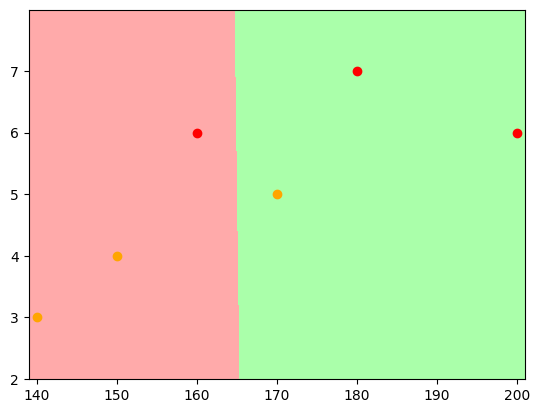

In [58]:
df_apple = df[df['label'] == 'Apple']
df_orange = df[df['label'] == 'Orange']
Z = np.array(Z).reshape(xx.shape)
label_to_int = {label: i for i, label in enumerate(['Orange', 'Apple'])}
Z_numerical = np.vectorize(label_to_int.get)(Z)
Z_numerical = Z_numerical.astype(int)
plt.pcolormesh(xx, yy, Z_numerical, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(df_apple['weight'], df_apple['sweetness'], c='red')
plt.scatter(df_orange['weight'], df_orange['sweetness'], c='orange')

plt.show()

## 1B)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
model = KNeighborsClassifier(3, metric='euclidean')
X = df.drop(['label', 'id'], axis=1).values
Y = df['label']
model.fit(X, Y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [61]:
pred = model.predict([[165, 5.5]])
print(f'Prediction for Weight=165, sweetness=5.5 is {pred}')

Prediction for Weight=165, sweetness=5.5 is ['Orange']
